# Remove background from image

original [link](https://www.kaggle.com/vfdev5/data-visualization)

This demo shows simple approach to remove background from image
To solve this problem

* create mask
* apply mask to remove background

We use 

* [OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)
* [NumPy](http://www.numpy.org/)

Fisrt, import modules

In [482]:
# Importing the libraries:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from pprint import pprint

%matplotlib inline

In [483]:
pytesseract.pytesseract.tesseract_cmd = r'C:\\Users\\atif7\AppData\\Local\\Programs\\Tesseract-OCR\\tesseract.exe'

## Example 1 Simple binary 2D array

Let's consider a simple two dimensional ten by ten array of zeros and ones.
Then, describe background removal algorithm using by this array

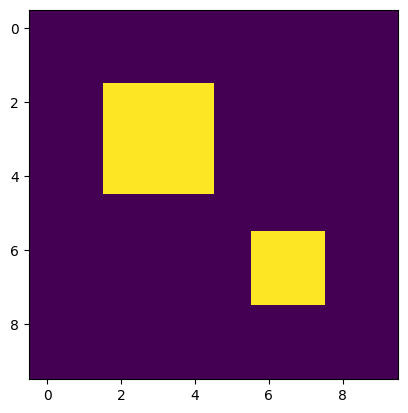

In [484]:
# Create sample array 10 by 10 from zeroes 
# It's important dtype=np.uint8
X = np.zeros((10, 10), dtype=np.uint8)

# Fill two rectangles with ones
X[2:5, 2:5] = 1
X[6:8, 6:8] = 1
        
# Finally, show binary image    
plt.imshow(X)

We've got an image with two rectangles on it
Show pixel distribution to ensure it uses only zeros and ones

<BarContainer object of 10 artists>

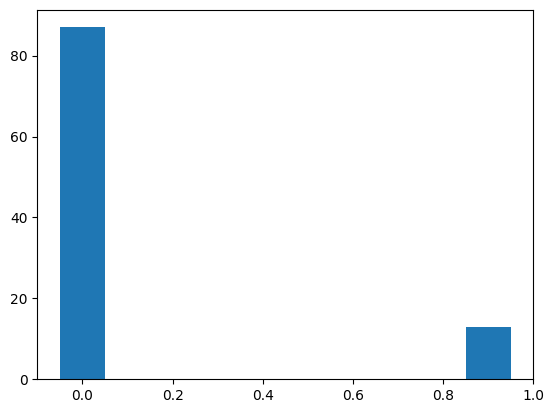

In [485]:
H = np.histogram(X)
plt.bar(H[1][:-1], H[0], width=.1)

As we can see from plot above, our image contains only 0 and 1.

### Detect contours

Next, let's find contours on image.

You can read more about contours in [OpenCV documentation](https://docs.opencv.org/3.0.0/d4/d73/tutorial_py_contours_begin.html)

In [486]:
contours, hierarchy = cv2.findContours(X,                       # Source image
                                          cv2.RETR_TREE,
                                          cv2.CHAIN_APPROX_SIMPLE  # only coordinates of corners 
                                         )

# Show contours
contours

(array([[[6, 6]],
 
        [[6, 7]],
 
        [[7, 7]],
 
        [[7, 6]]], dtype=int32),
 array([[[2, 2]],
 
        [[2, 4]],
 
        [[4, 4]],
 
        [[4, 2]]], dtype=int32))

Detected contours are presented by its corner' coordinates. You can easily match those coordinates with actual rectangles corners.

### Mask

Next step is, create mask from detected contours

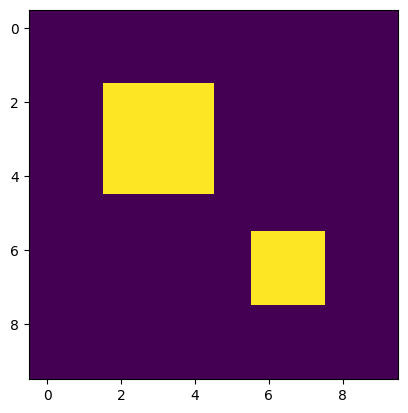

In [487]:
# Firstly, define empty mask with the shape of the original image
mask = np.zeros(shape=(X.shape[:2]), dtype=np.uint8)

# For each contour draw closed line and fill inner area of the contour with 1
cv2.drawContours(mask, contours, -1, (1,1, 0), cv2.FILLED)   

# Finally, visualise mask 
plt.imshow(mask)

### Cut of background from image by applying mask

After all, we subtract mask from image using by bitwise operator AND

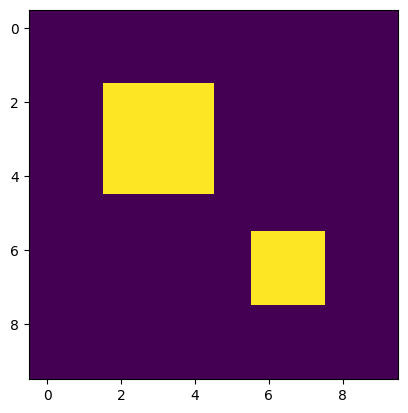

In [488]:
img_masked = cv2.bitwise_and(X, X, mask=mask)
plt.imshow(img_masked)

### Show results

Image shape: (10, 10) | image type: uint8 | mask shape: (10, 10) | mask type: uint8


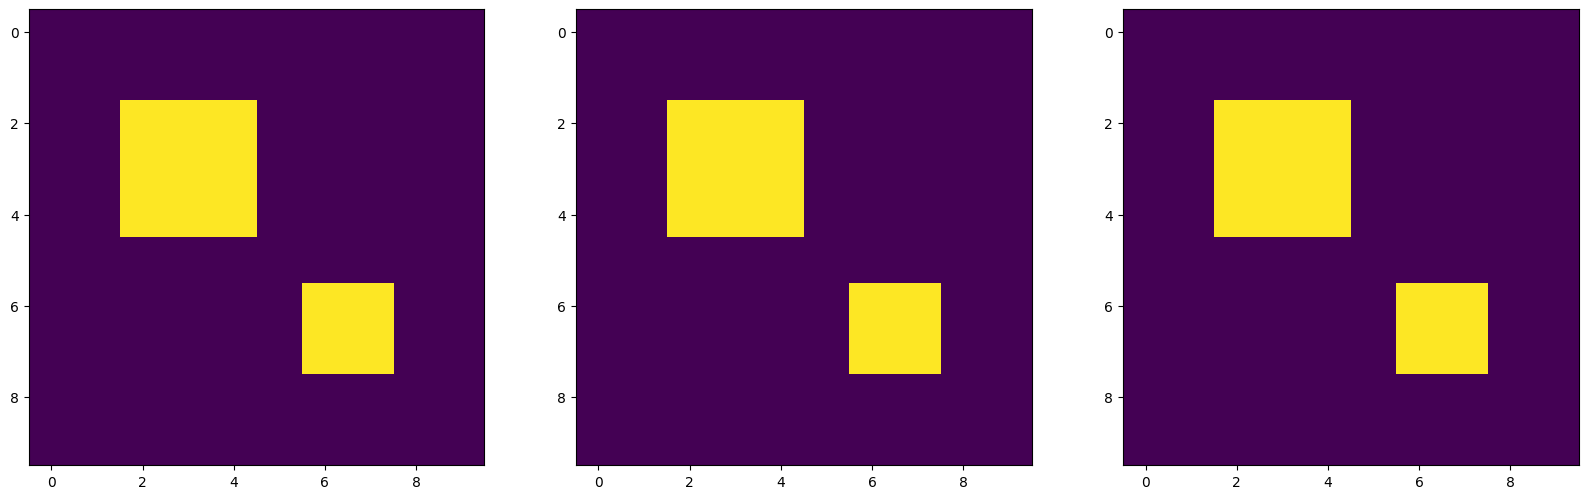

In [489]:
plt.figure(figsize=(20, 20))

print("Image shape: {} | image type: {} | mask shape: {} | mask type: {}".format(X.shape, X.dtype, mask.shape, mask.dtype) )

plt.subplot(131)
plt.imshow(X)
plt.subplot(132)
plt.imshow(mask)
plt.subplot(133)
plt.imshow(img_masked)

## Example 2.  simple 3D array represented RGB image

Before applying this method to the real images, let's show how it works on simple 3D rgb images

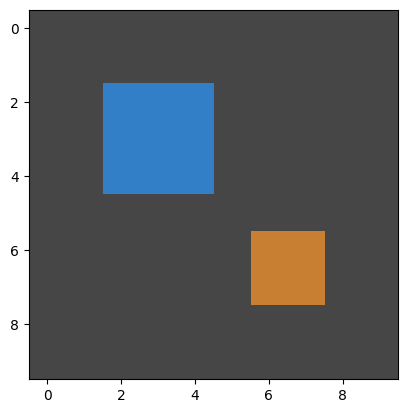

In [490]:
# Create sample array 10 by 10 from zeroes 
# It's important dtype=np.uint8
X = np.full((10, 10, 3), 70, dtype=np.uint8)

# Fill two rectangles with ones
X[2:5, 2:5, :] = [50, 127, 200]
X[6:8, 6:8, :] = [200, 127, 50]
        
# Finally, show binary image    
plt.imshow(X)

### Plot pixel value distribution

As shown in plot below, our sample binary image consists from 0 and 1.

<BarContainer object of 10 artists>

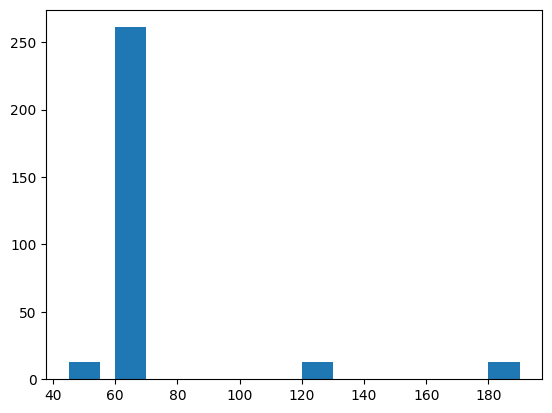

In [491]:
H = np.histogram(X)
plt.bar(H[1][:-1], H[0], width=10)

### Find contours

In [492]:
gray = (cv2.cvtColor(X, cv2.COLOR_BGR2GRAY)).astype(np.uint8)
ret,thresh = cv2.threshold(gray,
                           int(X[:, :, 0].mean()),
                           int(X[:, :, 1].mean()),
                           0)
contours, hierarchy = cv2.findContours(thresh,                       # Source image
                                          cv2.RETR_TREE,
                                          cv2.CHAIN_APPROX_SIMPLE  # only coordinates of corners 
                                         )

# Show contours
contours

(array([[[6, 6]],
 
        [[6, 7]],
 
        [[7, 7]],
 
        [[7, 6]]], dtype=int32),
 array([[[2, 2]],
 
        [[2, 4]],
 
        [[4, 4]],
 
        [[4, 2]]], dtype=int32))

### Plot mask

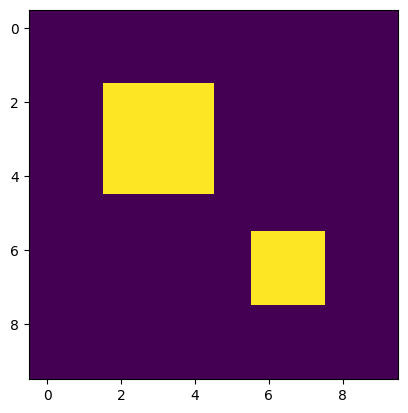

In [493]:
mask = np.zeros(shape=(X.shape[:2]), dtype=np.uint8)

cv2.drawContours(mask, contours, -1, (1,1, 0), cv2.FILLED)   

plt.imshow(mask)

### Subtract background

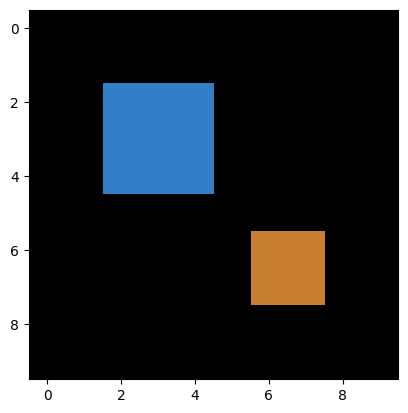

In [494]:
img_masked = cv2.bitwise_and(X, X, mask=mask)
plt.imshow(img_masked)

### Show results

Image shape: (10, 10, 3) | image type: uint8 | mask shape: (10, 10) | mask type: uint8


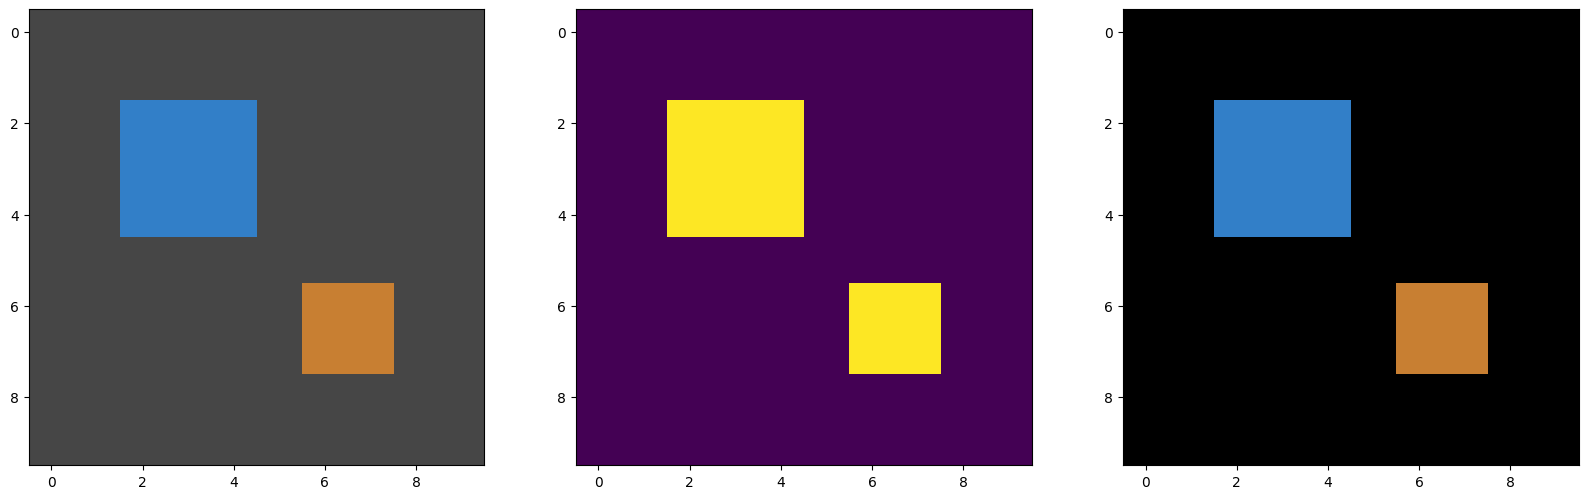

In [495]:
plt.figure(figsize=(20, 20))

print("Image shape: {} | image type: {} | mask shape: {} | mask type: {}".format(X.shape, X.dtype, mask.shape, mask.dtype) )

plt.subplot(131)
plt.imshow(X)
plt.subplot(132)
plt.imshow(mask)
plt.subplot(133)
plt.imshow(img_masked)

In [496]:
def show_image(window_name, img):
    plt.title(window_name)
    plt.imshow(img)
    plt.show()
    
    

## Example 3. Real image

This example shows approach for real image

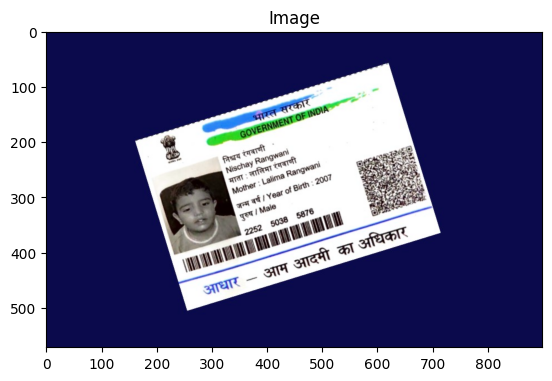

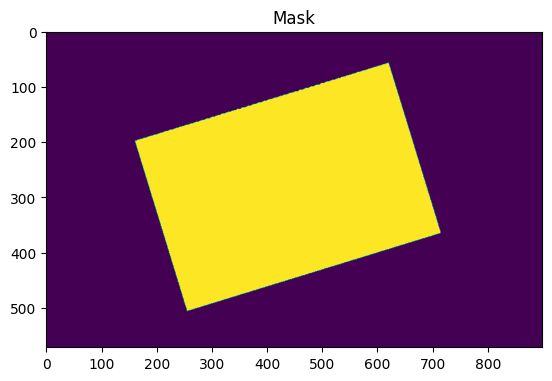

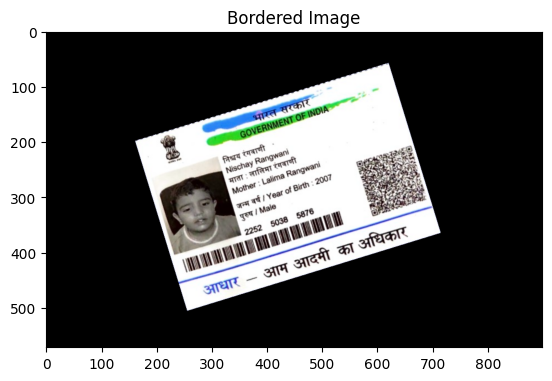

In [497]:
# Load image
image = cv2.imread('datasets\\aadhar.jpg').astype(np.uint8)

# Get contours
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the image
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Apply a threshold to the blurred image
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret, thresh = cv2.threshold(gray, int(image[:, :, 0].mean()), int(image[:, :, 1].mean()), 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find contour with largest area
max_contour = max(contours, key=cv2.contourArea)
show_image("Image", image)
# Draw contour on black background image
mask = np.zeros_like(gray)
cv2.drawContours(mask, [max_contour], 0, (255, 255, 255), -1)
show_image("Mask", mask)
# Extract bordered image using mask
bordered_image = cv2.bitwise_and(image, image, mask=mask)

show_image("Bordered Image", bordered_image)

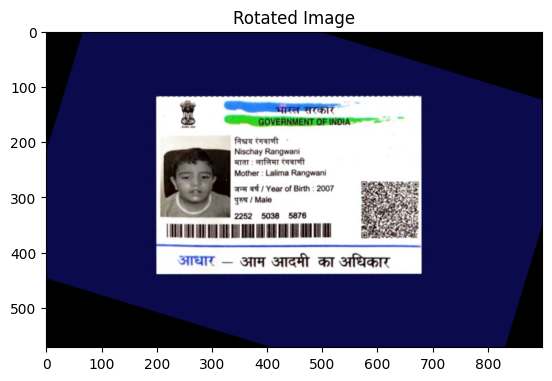

In [498]:
# Convert to grayscale
gray = cv2.cvtColor(bordered_image, cv2.COLOR_BGR2GRAY)

# Apply canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Apply Hough line transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# Find angles of lines with respect to horizontal axis
angles = []
for line in lines:
    rho, theta = line[0]
    if theta > np.pi/2:
        theta -= np.pi
    angle = np.degrees(theta)
    angles.append(angle)

# Rotate image by average angle
avg_angle = np.min(angles)
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_180)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)



rows, cols = rotated_image.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), avg_angle, 1)
rotated_image = cv2.warpAffine(rotated_image, M, (cols, rows))

show_image("Rotated Image", rotated_image)

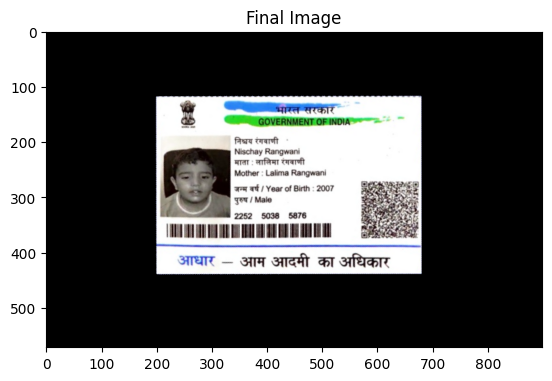

In [499]:
# Get contours
gray = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, int(image[:, :, 0].mean()), int(image[:, :, 1].mean()), 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find contour with largest area
max_contour = max(contours, key=cv2.contourArea)

# Draw contour on black background image
mask = np.zeros_like(gray)
cv2.drawContours(mask, [max_contour], 0, (255, 255, 255), -1)

# Extract bordered image using mask
final_image = cv2.bitwise_and(rotated_image, rotated_image, mask=mask)

show_image("Final Image", final_image)


## Apply canny edge again to gain new edges


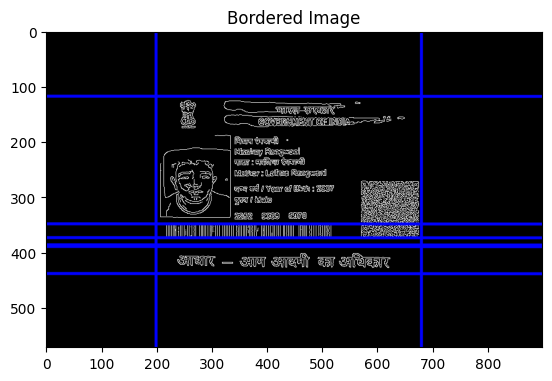

In [500]:
import math

# Convert to grayscale
gray = cv2.cvtColor(final_image, cv2.COLOR_BGR2GRAY)

# Apply canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
dstp = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# Apply Hough line transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
        cv2.line(dstp, pt1, pt2, (0, 0, 255), 3, cv2.LINE_AA)
        
show_image("Bordered Image", dstp)

## Cropped Image

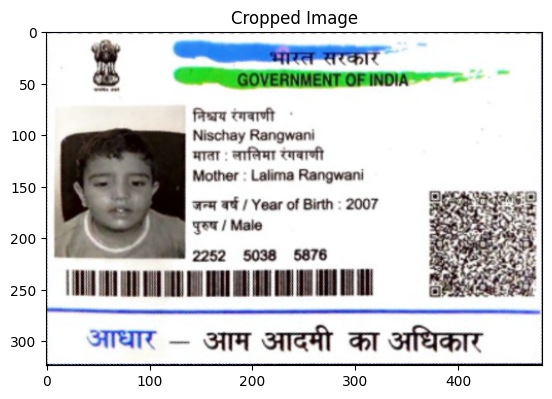

In [501]:
gray = cv2.cvtColor(final_image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

largest_contour = max(contours, key=cv2.contourArea)

x,y,w,h = cv2.boundingRect(largest_contour)

crop_img = final_image[y:y+h, x:x+w]

show_image("Cropped Image", crop_img)


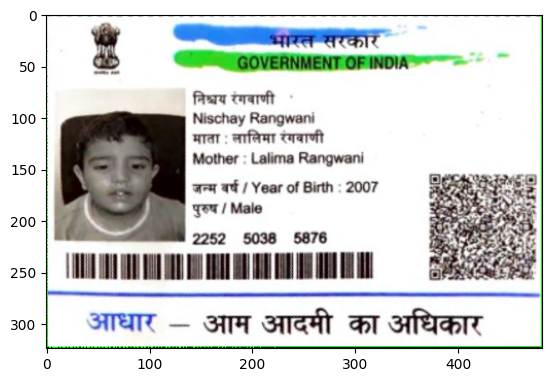

In [502]:
gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

outline_contours = crop_img.copy()
cv2.drawContours(outline_contours, contours, contourIdx=-1,color=(0, 255, 0))

plt.imshow(outline_contours, cmap='gray')
plt.show()

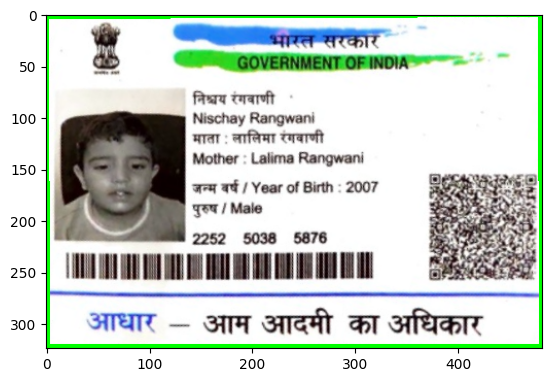

In [503]:
for contour in contours:
    # we approximate the contour
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.05 * peri, True)
    # if we found a countour with 4 points we break the for loop
    # (we can assume that we have found our document)
    if len(approx) == 4:
        doc_cnts = approx
        break
        
# We draw the contours on the original image not the modified one
all_contours = crop_img.copy()
cv2.drawContours(all_contours, [doc_cnts], -1, (0, 255, 0), 3)

plt.imshow(all_contours)
plt.show()

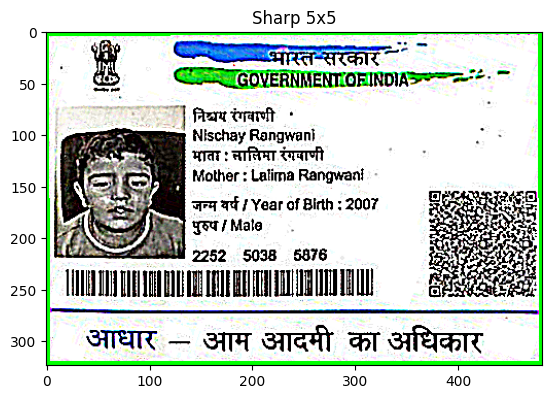

In [506]:
def unsharp_mask(image, kernel_size=(5, 5), sigma=20.0, amount=20.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

sharp = unsharp_mask(all_contours)
show_image("Sharp 5x5", sharp)

In [507]:
def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")

    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect

def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
    return warped

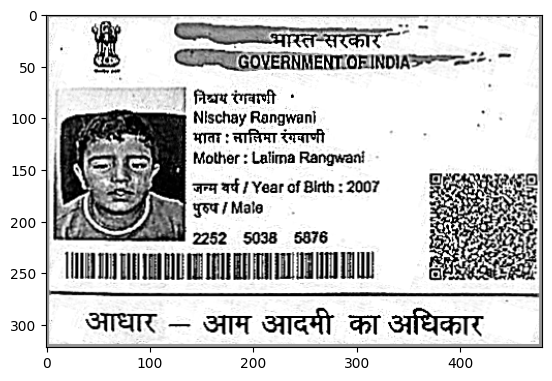

In [508]:
warped = four_point_transform(sharp, doc_cnts.reshape(4, 2))
# convert the warped image to grayscale
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
# cv2.imshow("Scanned", cv2.resize(warped, (600, 800)))

plt.imshow(warped, cmap='gray')
plt.show()

In [509]:
# Extracting text from cropped image
out_below = pytesseract.image_to_string(warped)
print(out_below)

g GERIGOVERNNENTIOF INDIA ">: ~
Nischay Rangwani

arate Gra

B Nother: Latima Rangwant

‘aaa / Year of Birth : 2007
yety Male

2252 5038 5876

TA
Ta — ot areatt er sia


